# üíÄ Bone Fracture Multi-Region X-ray

Ïù¥ Îç∞Ïù¥ÌÑ∞ÏÖãÏùÄ ÌïòÏßÄ, ÏÉÅÏßÄ, ÏöîÏ∂î, ÏóâÎç©Ïù¥, Î¨¥Î¶é Îì± Î™®Îì† Ìï¥Î∂ÄÌïôÏ†Å Ïã†Ï≤¥ Î∂ÄÏúÑÎ•º Ìè¨Ìï®ÌïòÎäî Í≥®Ï†à Î∞è ÎπÑÍ≥®Ï†à X-Î†àÏù¥ Ïù¥ÎØ∏ÏßÄÎ•º Ìè¨Ìï®ÌïòÍ≥† ÏûàÏäµÎãàÎã§. 

Îç∞Ïù¥ÌÑ∞ Ï∂úÏ≤ò : https://www.kaggle.com/datasets/bmadushanirodrigo/fracture-multi-region-x-ray-data/data


In [2]:
# import
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import random
from IPython.display import display


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

import torch
from torch import nn #Î™®Îç∏ Ï†ïÏùò
import torch.nn.functional as F #Î™®Îç∏ Ï†ïÏùò
from torch.utils.data import TensorDataset, DataLoader #Îç∞Ïù¥ÌÑ∞Î°úÎìú
from sklearn.preprocessing import LabelEncoder
from torchvision import datasets
from torchvision.transforms import ToTensor
import torch.optim as optim # ÏòµÌã∞ÎßàÏù¥Ï†Ä
from sklearn.metrics import precision_score, recall_score, f1_score

## Îç∞Ïù¥ÌÑ∞ ÏÇ¨Ï†Ñ Ï†ïÎ¶¨

In [3]:
# ÌååÏùºÎ™Ö Ï†ïÎ¶¨
def chage_name(folder_path, name_code, start_numder = 1):
    name_list = [file for file in os.listdir(folder_path) if file.endswith((".png",".jpg",".jpeg"))]
    digit = len(str(len(name_list))) + 1
    for idex, file in enumerate(name_list):
        numder = digit - len(str(idex))
        position = file.rfind(".")
        following_text = file[position:]

        old_file_path = os.path.join(folder_path, file)
        new_file_name = name_code + "0" * numder + str(idex + start_numder) + following_text
        new_file_path = os.path.join(folder_path, new_file_name)
        os.rename(old_file_path, new_file_path)

    updated_files = os.listdir(folder_path)
    print(updated_files)

In [4]:
# ÌååÏùº ÌôïÏ†ïÏûê Î≥ÄÍ≤Ω
def change_file_determiner(directory):
    for filename in os.listdir(directory):
        if filename.endswith(".png") or filename.endswith(".bmp"):
            img_path = os.path.join(directory, filename)
            img = Image.open(img_path)
            # ÌåîÎ†àÌä∏ Î™®Îìú(P)ÏóêÏÑú RGBÎ°ú Î≥ÄÌôò
            if img.mode == 'P':
                img = img.convert('RGB')
            # RGBAÎ•º RGBÎ°ú Î≥ÄÌôò, ÌïÑÏöîÌïú Í≤ΩÏö∞
            elif img.mode == 'RGBA':
                img = img.convert('RGB')
            new_filename = filename.split('.')[0] + '.jpeg'
            new_img_path = os.path.join(directory, new_filename)
            img.save(new_img_path, 'JPEG')
            os.remove(img_path)  # ÏõêÎ≥∏ ÌååÏùº ÏÇ≠Ï†ú

In [5]:
# F_name = "BXF_TR_"
# image_path_fractured = "/Users/bumsoojoe/Desktop/Project/Bone Fracture DL/Data/Bone_Fracture_Binary_Classification/train/fractured"

# N_name = "BXN_TR_"
# image_path_No = "/Users/bumsoojoe/Desktop/Project/Bone Fracture DL/Data/Bone_Fracture_Binary_Classification/train/not fractured"

# change_file_determiner(image_path_fractured)
# chage_name(image_path_fractured,F_name,0)
# change_file_determiner(image_path_No)
# chage_name(image_path_No,N_name,0)


# F_name = "BXF_VA_"
# image_path_fractured = "/Users/bumsoojoe/Desktop/Project/Bone Fracture DL/Data/Bone_Fracture_Binary_Classification/val/fractured"

# N_name = "BXN_VA_"
# image_path_No = "/Users/bumsoojoe/Desktop/Project/Bone Fracture DL/Data/Bone_Fracture_Binary_Classification/val/not fractured"

# change_file_determiner(image_path_fractured)
# chage_name(image_path_fractured,F_name,0)
# change_file_determiner(image_path_No)
# chage_name(image_path_No,N_name,0)

# F_name = "BXF_TE_"
# image_path_fractured = "/Users/bumsoojoe/Desktop/Project/Bone Fracture DL/Data/Bone_Fracture_Binary_Classification/test/fractured"

# N_name = "BXN_TE_"
# image_path_No = "/Users/bumsoojoe/Desktop/Project/Bone Fracture DL/Data/Bone_Fracture_Binary_Classification/test/not fractured"

# change_file_determiner(image_path_fractured)
# chage_name(image_path_fractured,F_name,0)
# change_file_determiner(image_path_No)
# chage_name(image_path_No,N_name,0)

In [6]:
data_dir = "/Users/bumsoojoe/Desktop/Project/Bone Fracture DL/Data"
data = os.listdir(data_dir)
len(data)

3

In [7]:
def data_image_len(dir):
    data = os.listdir(dir)
    return len(data)

In [8]:
BB_test_fr = "/Users/bumsoojoe/Desktop/Project/Bone Fracture DL/Data/Bone_Fracture_Binary_Classification/test/fractured"
BB_test_nfr = "/Users/bumsoojoe/Desktop/Project/Bone Fracture DL/Data/Bone_Fracture_Binary_Classification/test/not fractured"
BB_train_fr = "/Users/bumsoojoe/Desktop/Project/Bone Fracture DL/Data/Bone_Fracture_Binary_Classification/train/fractured"
BB_train_nfr = "/Users/bumsoojoe/Desktop/Project/Bone Fracture DL/Data/Bone_Fracture_Binary_Classification/train/not fractured"
BB_val_fr = "/Users/bumsoojoe/Desktop/Project/Bone Fracture DL/Data/Bone_Fracture_Binary_Classification/val/fractured"
BB_val_nfr = "/Users/bumsoojoe/Desktop/Project/Bone Fracture DL/Data/Bone_Fracture_Binary_Classification/val/not fractured"

data_dir_list = [BB_test_fr,BB_test_nfr,BB_train_fr,BB_train_nfr,BB_val_fr,BB_val_nfr]

totel = 0
for i in data_dir_list:
    totel += data_image_len(i)
    print(data_image_len(i))
print(totel)

238
268
4604
4640
337
492
10579


In [9]:
def show_random_images(image_path):
    # Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÌôïÏû•Ïûê Î¶¨Ïä§Ìä∏
    valid_extensions = ['.jpg', '.jpeg', '.png', '.gif', '.bmp']
    
    # Ï£ºÏñ¥ÏßÑ Í≤ΩÎ°úÏóêÏÑú Î™®Îì† ÌååÏùºÏùÑ Î¶¨Ïä§Ìä∏ÏóÖ
    all_files = [os.path.join(image_path, f) for f in os.listdir(image_path) if os.path.isfile(os.path.join(image_path, f))]
    
    # Ïù¥ÎØ∏ÏßÄ ÌååÏùºÎßå ÌïÑÌÑ∞ÎßÅ
    image_files = [f for f in all_files if os.path.splitext(f)[1].lower() in valid_extensions]
    
    # Ïù¥ÎØ∏ÏßÄ ÌååÏùºÏù¥ 9Í∞ú ÎØ∏ÎßåÏùº Í≤ΩÏö∞ Î™®Îì† Ïù¥ÎØ∏ÏßÄÎ•º Î≥¥Ïó¨Ï§å
    if len(image_files) < 9:
        selected_images = image_files
    else:
        # Î¨¥ÏûëÏúÑÎ°ú 9Í∞úÏùò Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏÑ†ÌÉù
        selected_images = random.sample(image_files, 9)
    
    # ÏÑ†ÌÉùÎêú Ïù¥ÎØ∏ÏßÄ ÌååÏùºÏùÑ Ï∂úÎ†•
    for image_file in selected_images:
        image = Image.open(image_file)
        display(image)

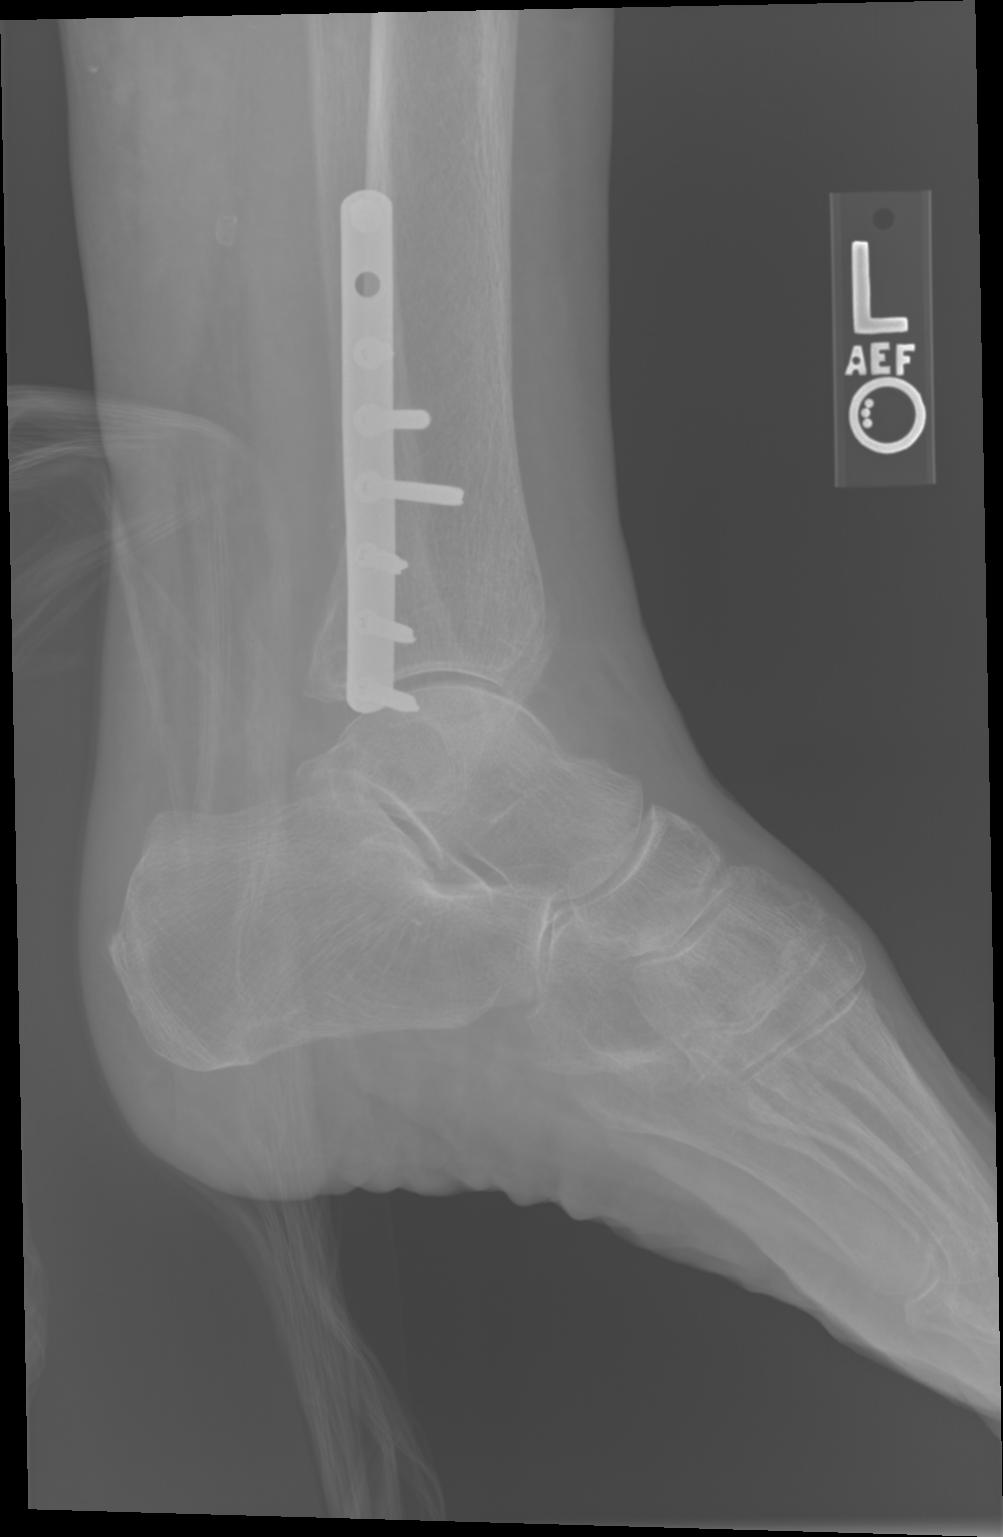

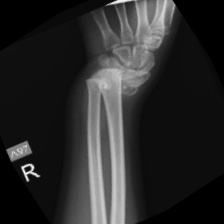

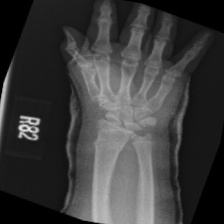

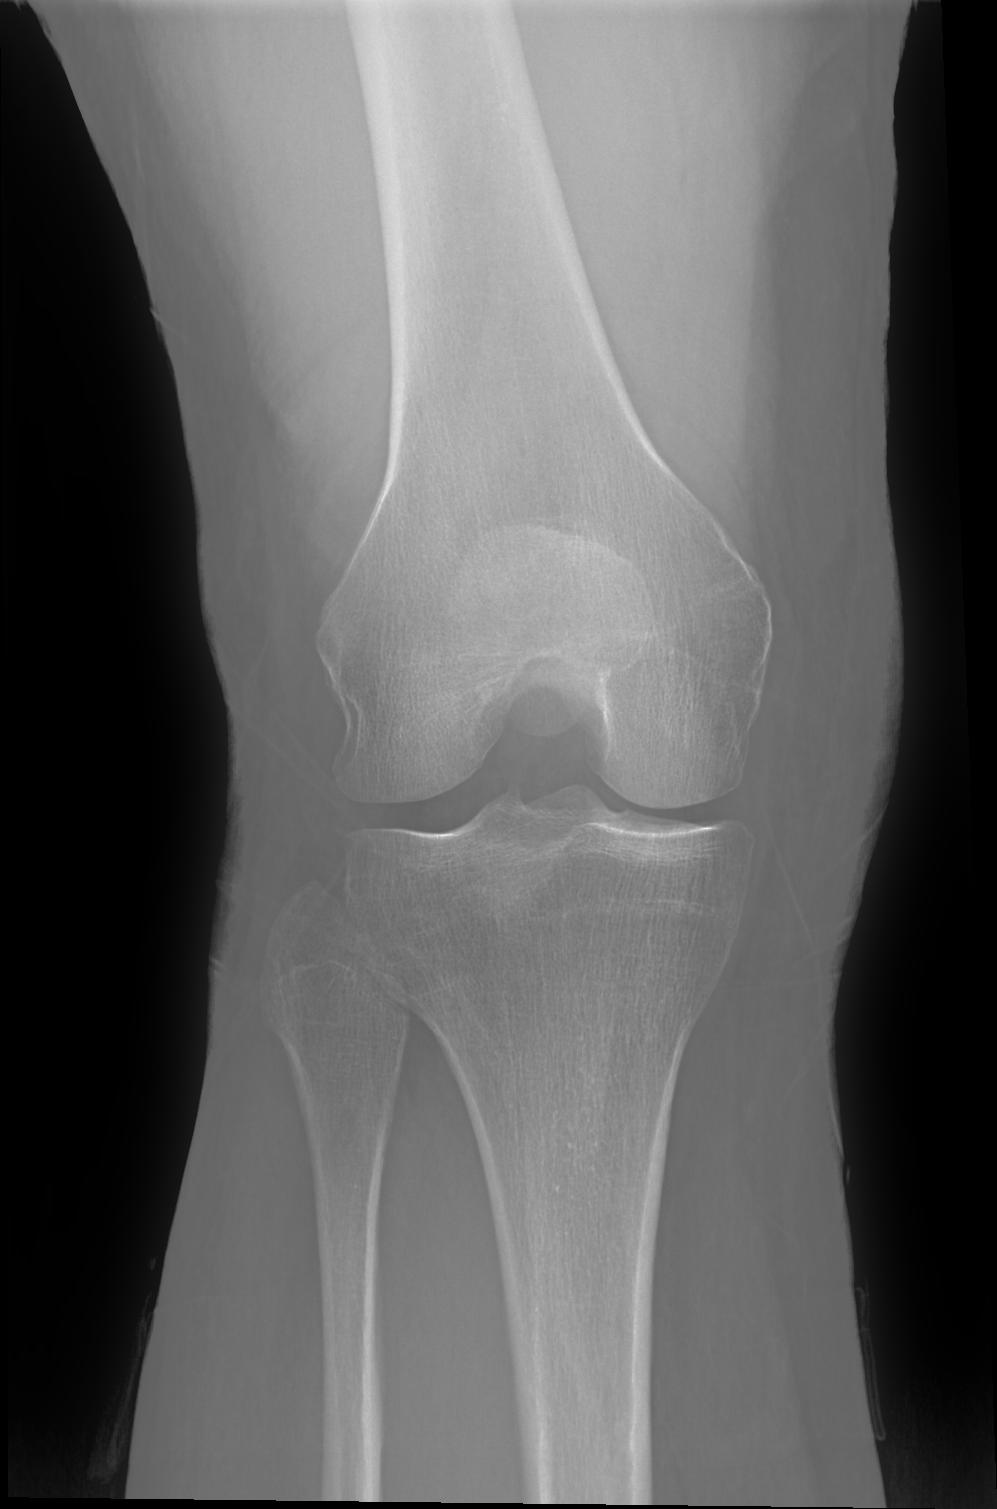

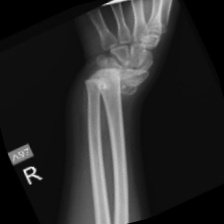

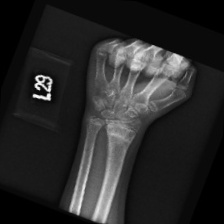

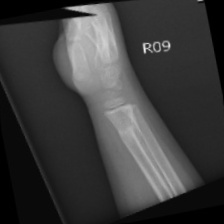

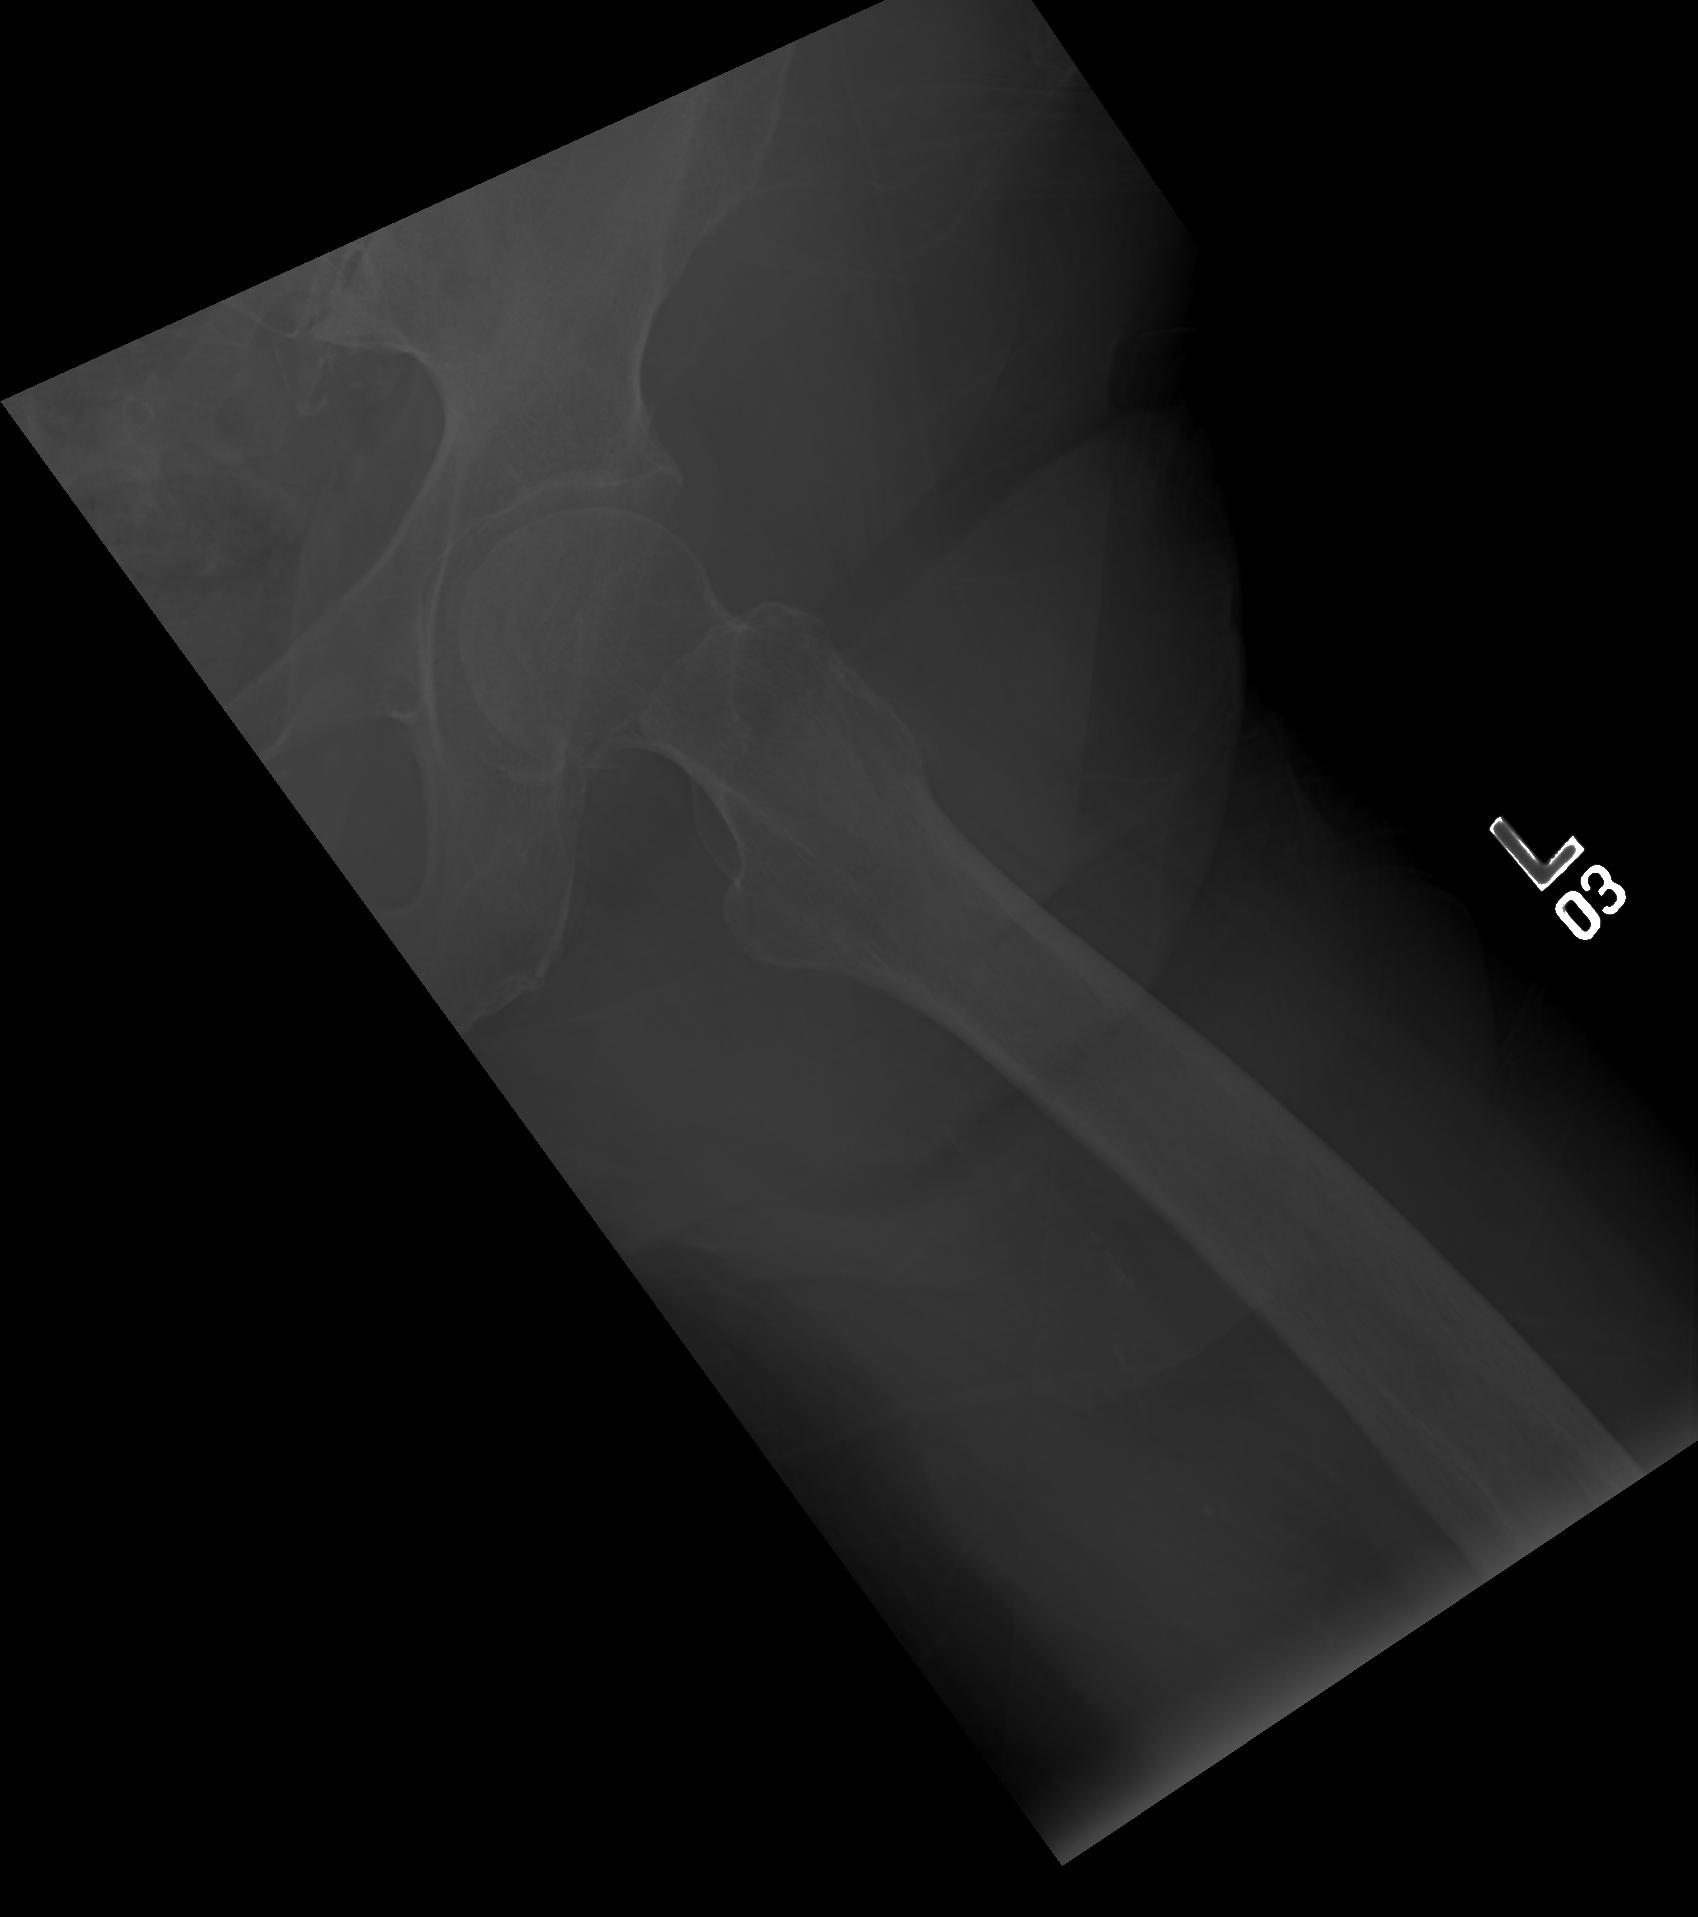

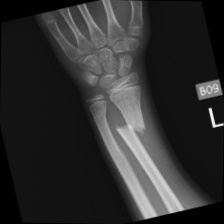

In [10]:
show_random_images(BB_test_fr)

In [11]:
def get_image_size(image_path):
    # Ïù¥ÎØ∏ÏßÄ ÌååÏùº Ïó¥Í∏∞
    with Image.open(image_path) as img:
        # Ïù¥ÎØ∏ÏßÄÏùò ÌÅ¨Í∏∞Î•º Î∞òÌôò
        return img.size  # (width, height)

In [12]:
image_size = get_image_size('/Users/bumsoojoe/Desktop/Project/Bone Fracture DL/Data/Bone_Fracture_Binary_Classification/test/fractured/BXF_TE_0000.jpg')
print(f'Image size: {image_size[0]} x {image_size[1]} pixels')  # Í∞ÄÎ°ú x ÏÑ∏Î°ú ÌîΩÏÖÄÎ°ú Ï∂úÎ†•

Image size: 224 x 224 pixels


In [13]:
name_list = [file for file in os.listdir(BB_test_fr) if file.endswith((".png",".jpg",".jpeg"))]
name_list

['BXF_TE_0132.jpg',
 'BXF_TE_0126.jpg',
 'BXF_TE_0068.jpeg',
 'BXF_TE_0085.jpg',
 'BXF_TE_0091.jpg',
 'BXF_TE_0046.jpg',
 'BXF_TE_0052.jpg',
 'BXF_TE_0053.jpg',
 'BXF_TE_0047.jpg',
 'BXF_TE_0005.jpeg',
 'BXF_TE_0090.jpg',
 'BXF_TE_0084.jpg',
 'BXF_TE_0101.jpeg',
 'BXF_TE_0133.jpg',
 'BXF_TE_0125.jpg',
 'BXF_TE_0131.jpg',
 'BXF_TE_0208.jpeg',
 'BXF_TE_0119.jpg',
 'BXF_TE_0160.jpeg',
 'BXF_TE_0092.jpg',
 'BXF_TE_0086.jpg',
 'BXF_TE_0051.jpg',
 'BXF_TE_0045.jpg',
 'BXF_TE_0078.jpg',
 'BXF_TE_0044.jpg',
 'BXF_TE_0050.jpg',
 'BXF_TE_0087.jpg',
 'BXF_TE_0118.jpg',
 'BXF_TE_0130.jpg',
 'BXF_TE_0124.jpg',
 'BXF_TE_0108.jpg',
 'BXF_TE_0134.jpg',
 'BXF_TE_0049.jpeg',
 'BXF_TE_0097.jpg',
 'BXF_TE_0083.jpg',
 'BXF_TE_0054.jpg',
 'BXF_TE_0041.jpg',
 'BXF_TE_0055.jpg',
 'BXF_TE_0069.jpg',
 'BXF_TE_0082.jpg',
 'BXF_TE_0136.jpeg',
 'BXF_TE_0024.jpeg',
 'BXF_TE_0135.jpg',
 'BXF_TE_0121.jpg',
 'BXF_TE_0109.jpg',
 'BXF_TE_0120.jpeg',
 'BXF_TE_0157.jpeg',
 'BXF_TE_0137.jpg',
 'BXF_TE_0043.jpg',
 'BXF_TE_0

In [14]:
name_list = []

for i in data_dir_list:
    name_list.extend([file for file in os.listdir(i) if file.endswith((".png",".jpg",".jpeg"))])


In [15]:
df = pd.DataFrame()

In [16]:
df["Image_name"] = name_list

In [17]:
df

Image_name
0       BXF_TE_0132.jpg
1       BXF_TE_0126.jpg
2      BXF_TE_0068.jpeg
3       BXF_TE_0085.jpg
4       BXF_TE_0091.jpg
...                 ...
10574   BXN_VA_0325.jpg
10575   BXN_VA_0443.jpg
10576   BXN_VA_0457.jpg
10577   BXN_VA_0331.jpg
10578   BXN_VA_0480.jpg

[10579 rows x 1 columns]

In [18]:
def Image_sizes(name,wh): #(width : 0 , height : 1)
    names = name.split("_")
    if names[1] == "TE" and "F" in names[0]:
        pro_dir = BB_test_fr
    elif names[1] == "TE" and "N" in names[0]:
        pro_dir = BB_test_nfr
    elif names[1] == "TR" and "F" in names[0]:
        pro_dir = BB_train_fr
    elif names[1] == "TR" and "N" in names[0]:
        pro_dir = BB_train_nfr
    elif names[1] == "VA" and "F" in names[0]:
        pro_dir = BB_val_fr
    else:
        pro_dir = BB_val_nfr

    dir = pro_dir + "/" + name
    image_size = get_image_size(dir)
    return image_size[wh]


In [19]:
Image_sizes("BXN_VA_0480.jpg",0)

373

In [20]:
df["width"] = df.Image_name.apply(lambda x : Image_sizes(x,0))
df["height"] = df.Image_name.apply(lambda x : Image_sizes(x,1))
df

Image_name  width  height
0       BXF_TE_0132.jpg    224     224
1       BXF_TE_0126.jpg    224     224
2      BXF_TE_0068.jpeg    846    1498
3       BXF_TE_0085.jpg    224     224
4       BXF_TE_0091.jpg    224     224
...                 ...    ...     ...
10574   BXN_VA_0325.jpg    224     224
10575   BXN_VA_0443.jpg    224     224
10576   BXN_VA_0457.jpg    224     224
10577   BXN_VA_0331.jpg    224     224
10578   BXN_VA_0480.jpg    373     454

[10579 rows x 3 columns]

In [21]:
print(f'Image Min size: {min(df["width"])} x {min(df["height"])} pixels')
print(f'Image Max size: {max(df["width"])} x {max(df["height"])} pixels')
print(f'Image Mean size: {df["width"].mean().round(2)} x {df["height"].mean().round(2)} pixels')
# Î™®Îì† Ïù¥ÎØ∏ÏßÄ ÏÇ¨Ïù¥Ï¶àÎ•º 100 x 100ÏúºÎ°ú Ï∂ïÏÜåÌï¥ÏïºÌïúÎã§.

Image Min size: 100 x 100 pixels
Image Max size: 4232 x 5823 pixels
Image Mean size: 299.7 x 325.03 pixels


In [22]:
len(df[df["width"] < 224])

64

In [23]:
len(df[df["height"] < 224])

43

In [24]:
def fractured(name):
    names = name.split("_")
    if "F" in names[0]:
        return 1
    else:
        return 0

In [25]:
df["taget"] = df.Image_name.apply(lambda x : fractured(x))
df

Image_name  width  height  taget
0       BXF_TE_0132.jpg    224     224      1
1       BXF_TE_0126.jpg    224     224      1
2      BXF_TE_0068.jpeg    846    1498      1
3       BXF_TE_0085.jpg    224     224      1
4       BXF_TE_0091.jpg    224     224      1
...                 ...    ...     ...    ...
10574   BXN_VA_0325.jpg    224     224      0
10575   BXN_VA_0443.jpg    224     224      0
10576   BXN_VA_0457.jpg    224     224      0
10577   BXN_VA_0331.jpg    224     224      0
10578   BXN_VA_0480.jpg    373     454      0

[10579 rows x 4 columns]

In [40]:
df["taget"].value_counts()

taget
0    5400
1    5179
Name: count, dtype: int64

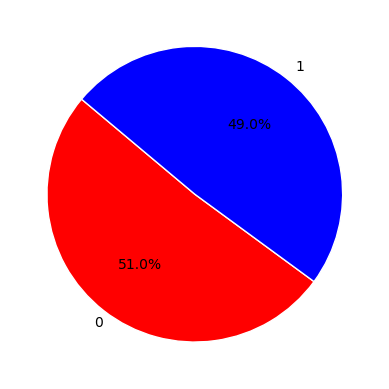

In [39]:
plt.pie(df["taget"].value_counts(),labels=df["taget"].value_counts().index, colors=["red","blue"], center=(4,4),
       wedgeprops={"linewidth": 1, "edgecolor": "white"},autopct='%1.1f%%', startangle=140)
plt.show()